<a target="_blank" href="https://colab.research.google.com/github/Sebelino/DD2424-project/blob/main/e1_sebastian.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [7]:

%load_ext autoreload
%autoreload 2

import os
import socket

repo_name = "DD2424-project"
dep_filename = "download_dataset.py"
cwd = os.getcwd()
hostname = socket.gethostname()

print(f"Host: {hostname}")
print(f"You are here: {cwd}")

if os.path.exists(dep_filename):
    print(f"{dep_filename} is in your current directory. Assuming you are in the root of the repository.")
elif not os.path.exists(repo_name):
    print(f"Cloning repo and fetching {dep_filename}...")
    !git clone https://github.com/Sebelino/DD2424-project
    !cp DD2424-project/download_dataset.py .
else:
    !git -C DD2424-project pull --rebase
    !cp DD2424-project/download_dataset.py .

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Host: deeplearning-vm
You are here: /home/sebelino7_gmail_com/pycharm_depl
download_dataset.py is in your current directory. Assuming you are in the root of the repository.


In [8]:
from determinism import Determinism

determinism = Determinism(seed=42).sow()  # Keep this before any torch import
print("Training results should now be reproducible.")


Training results should now be reproducible.


# Train model

In [17]:
%reload_ext autoreload
%autoreload 2

from training import TrainParams, NagParams
from evaluation import evaluate_test_accuracy_and_misclassified, \
    evaluate_with_train_val_plot, run_with_different_seeds, run_comparison
from run import run
from caching import invalidate_cache_entry
from datasets import DatasetParams

dataset_params = DatasetParams(
    splitting_seed=determinism.seed,
    shuffler_seed=determinism.seed,
    batch_size=32,
    trainval_size=None,  # Load all training data
    #trainval_size=400,  # Load a subset
    validation_set_fraction=0.2,  # 20 % of trainval set
)

baseline_params = TrainParams(
    seed=determinism.seed,
    architecture="resnet50",
    n_epochs=10,
    optimizer=NagParams(
        learning_rate=0.022630885203465553,
        weight_decay=8.478660307897792e-05,
        momentum=0.8063799868511693,
    ),
    freeze_layers=True,
    unfreezing_epochs=(2, 4),
    validation_freq=1,
    time_limit_seconds=None,
    val_acc_target=None,
)

run_args = (dataset_params, baseline_params, determinism)

# Set invalidate=True to invalidate a single cache entry
invalidate_cache_entry(run, run_args, invalidate=True)

# First plot: Training and validation accuracy
print("Training with params:")
print(baseline_params.pprint())
result = run(*run_args)

print("Training result:")
print(result.pprint())
evaluate_with_train_val_plot(result)


Invalidate cache entry: successful
Training with params:
{
  "seed": 42,
  "architecture": "resnet50",
  "optimizer": {
    "learning_rate": 0.022630885203465553,
    "weight_decay": 8.478660307897792e-05,
    "momentum": 0.8063799868511693,
    "name": "nag"
  },
  "n_epochs": 10,
  "freeze_layers": true,
  "unfreezing_epochs": [2, 4],
  "validation_freq": 1,
  "unsup_weight": 0.5,
  "pseudo_threshold": 0.95,
  "masked_finetune": false,
  "mask_K": 1,
  "contrastive_temp": 0.1
}
len(train_subset)=2946
len(val_subset)=734


Update step:   0%|          | 0/930 [00:00<?, ?it/s]

KeyboardInterrupt: 

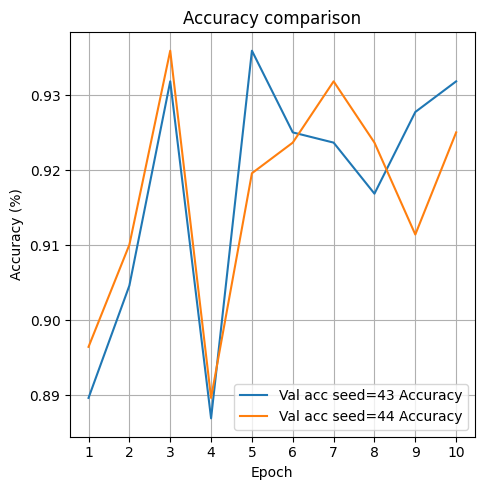

In [10]:
# Second plot: Rerun training multiple times with different seed
run_with_different_seeds(dataset_params, baseline_params, trials=2)

Creating balanced split...


  0%|          | 0/3680 [00:00<?, ?it/s]

Update step:   0%|          | 0/930 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f722b86c8b0>
Traceback (most recent call last):
  File "/opt/python/3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/opt/python/3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/opt/python/3.10/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f722b86c8b0>
Traceback (most recent call last):
  File "/opt/python/3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/opt/python/3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
  

Epoch [1/10], Loss: 1.1758, Train Acc: 69.79%, Val Acc: 45.64%
Epoch [2/10], Loss: 0.4730, Train Acc: 84.62%, Val Acc: 80.11%
Epoch [3/10], Loss: 0.1302, Train Acc: 96.30%, Val Acc: 67.57%
Epoch [4/10], Loss: 0.0944, Train Acc: 98.10%, Val Acc: 50.00%
Epoch [5/10], Loss: 0.1389, Train Acc: 96.30%, Val Acc: 70.44%
Epoch [6/10], Loss: 0.1806, Train Acc: 95.28%, Val Acc: 68.94%
Epoch [7/10], Loss: 0.1818, Train Acc: 95.45%, Val Acc: 67.57%
Epoch [8/10], Loss: 0.1435, Train Acc: 96.50%, Val Acc: 70.84%
Epoch [9/10], Loss: 0.0845, Train Acc: 97.66%, Val Acc: 84.74%
Epoch [10/10], Loss: 0.0358, Train Acc: 99.22%, Val Acc: 82.97%
Total elapsed: 120.56s, average per update step: 0.09s
[Trainer] Saved checkpoint to runs/checkpoints/a431c77950f670c6876b5a2bb4c1e6ac.pth


Update step:   0%|          | 0/930 [00:00<?, ?it/s]

Epoch [1/10], Loss: 1.0325, Train Acc: 73.59%, Val Acc: 45.50%
Epoch [2/10], Loss: 0.4623, Train Acc: 85.54%, Val Acc: 79.56%
Epoch [3/10], Loss: 0.1544, Train Acc: 95.15%, Val Acc: 70.71%
Epoch [4/10], Loss: 0.2958, Train Acc: 90.94%, Val Acc: 39.92%
Epoch [5/10], Loss: 0.2756, Train Acc: 92.12%, Val Acc: 61.85%
Epoch [6/10], Loss: 0.1806, Train Acc: 95.04%, Val Acc: 73.71%
Epoch [7/10], Loss: 0.1568, Train Acc: 95.66%, Val Acc: 64.03%
Epoch [8/10], Loss: 0.1965, Train Acc: 95.04%, Val Acc: 63.90%
Epoch [9/10], Loss: 0.1634, Train Acc: 95.62%, Val Acc: 74.80%
Epoch [10/10], Loss: 0.1343, Train Acc: 96.95%, Val Acc: 68.12%
Total elapsed: 123.45s, average per update step: 0.10s
[Trainer] Saved checkpoint to runs/checkpoints/174efdf3ba288f04e2b05640f14f0760.pth


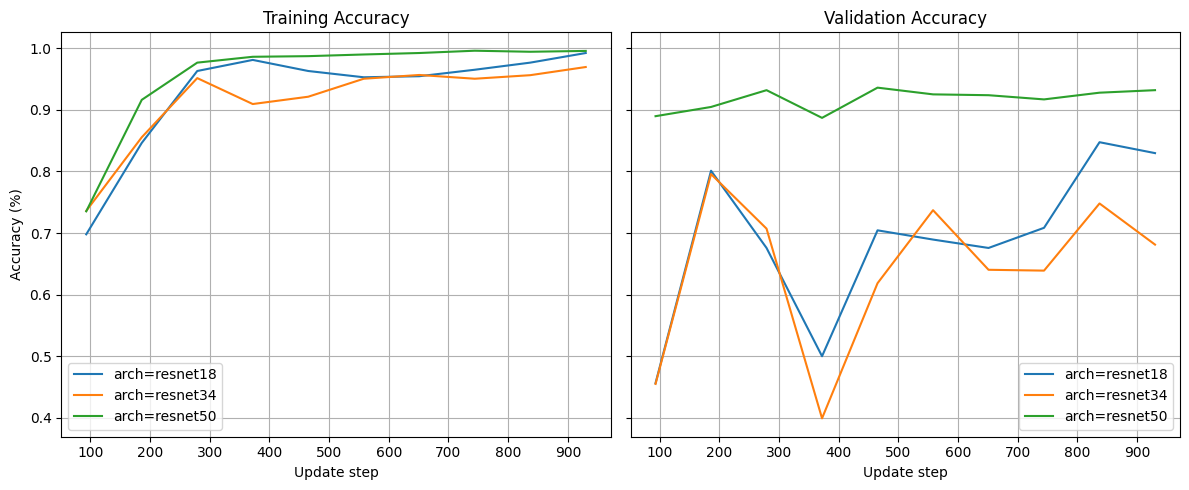

In [11]:

def tweak(params: TrainParams, architecture):
    params = params.copy()
    params.architecture = architecture
    return params


# Third plot: Compare learning rates
architectures = [
    "resnet18",
    "resnet34",
    "resnet50",
]
param_sets = {f"arch={arch}": tweak(baseline_params, architecture=arch) for arch in architectures}

run_comparison(dataset_params, param_sets)


# Test model

In [14]:

from run import try_loading_trainer
from evaluation import evaluate_test_accuracy
from torch.utils.data import DataLoader
from datasets import load_dataset
from training import Trainer
from util import suppress_weights_only_warning

suppress_weights_only_warning()

training_params = baseline_params

trainer = try_loading_trainer(dataset_params, baseline_params, determinism)

test_dataset = load_dataset("test", Trainer.make_transform(training_params))
test_loader = DataLoader(
    test_dataset,
    batch_size=dataset_params.batch_size,
    shuffle=False,
    num_workers=3,
    persistent_workers=False,
    pin_memory=True,
    worker_init_fn=Determinism.data_loader_worker_init_fn(dataset_params.shuffler_seed),
)
print(f"Test size: {len(test_loader.dataset)}")

final_test_acc = evaluate_test_accuracy(trainer, test_loader)

print(f"Final Test Accuracy: {final_test_acc:.2f}%")

Trying to load trainer from disk...
Trainer not found. Retraining...


Update step:   0%|          | 0/930 [00:00<?, ?it/s]

Epoch [1/10], Loss: 1.4615, Train Acc: 74.88%, Val Acc: 89.37%
Epoch [2/10], Loss: 0.3105, Train Acc: 91.14%, Val Acc: 92.51%
Epoch [3/10], Loss: 0.1086, Train Acc: 97.42%, Val Acc: 93.19%
Epoch [4/10], Loss: 0.0656, Train Acc: 98.78%, Val Acc: 92.10%
Epoch [5/10], Loss: 0.0477, Train Acc: 99.22%, Val Acc: 92.64%
Epoch [6/10], Loss: 0.0555, Train Acc: 99.15%, Val Acc: 93.73%
Epoch [7/10], Loss: 0.0352, Train Acc: 99.56%, Val Acc: 90.46%
Epoch [8/10], Loss: 0.0352, Train Acc: 99.32%, Val Acc: 92.92%
Epoch [9/10], Loss: 0.0362, Train Acc: 99.42%, Val Acc: 92.51%
Epoch [10/10], Loss: 0.0266, Train Acc: 99.69%, Val Acc: 93.87%
Total elapsed: 126.22s, average per update step: 0.09s
Test size: 3669


Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Final Test Accuracy: 91.03%


# Misclassified images

Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Final Test Accuracy: 91.03%
Number of misclassified samples: 329


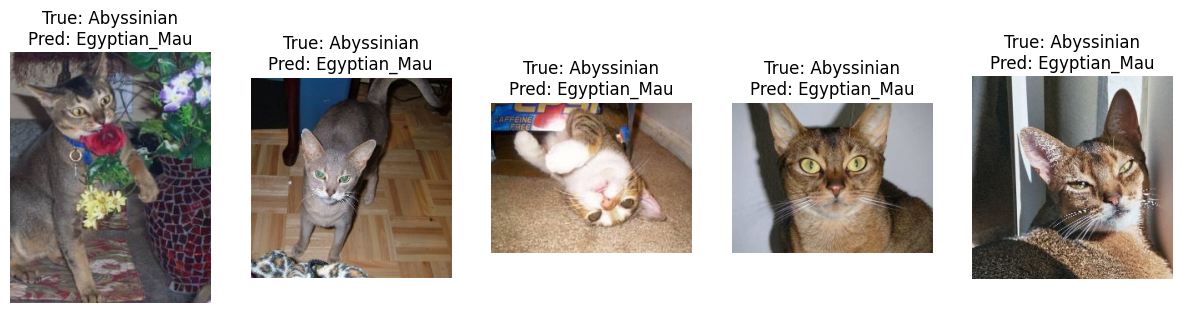

Copied 329 misclassified images to ./misclassified


In [15]:
from evaluation import show_misclassified

final_test_acc, misclassified_samples = evaluate_test_accuracy_and_misclassified(trainer, test_loader, test_dataset)
print(f"Final Test Accuracy: {final_test_acc:.2f}%")
print(f"Number of misclassified samples: {len(misclassified_samples)}")
show_misclassified(misclassified_samples)